# Narendra Modi vs Rahul Gandhi Recognizer¶
Structure your datasets into a directory structure like this,<br>

replace the `class_A` and `class_B` names with whatever you want to show your CNN model as the y-label<br>

dataset:
    - training_set
            - class_A
            - class_B
    - test_set
            - class_A
            - class_B


In [1]:
from keras.models import Sequential

Using TensorFlow backend.


In [1]:
from keras.layers import Dense
from keras.layers import Conv2D,MaxPool2D,Flatten
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


**building the CNN**

In [15]:
classifier= Sequential()
# convolution layer-32 feature detectors of 3X3 shape plus a rectifier on top of our convolved feature map
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

W0904 21:44:11.843930 12504 deprecation_wrapper.py:119] From C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 21:44:12.166700 12504 deprecation_wrapper.py:119] From C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [17]:
# max pooling of 2x2 shape
classifier.add(MaxPool2D(pool_size=(2,2)))

# another convolution layer
classifier.add(Conv2D(32,(3,3),activation='relu'))

# max pooling of 2x2 shape
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flattening layer
classifier.add(Flatten())

# fully connected layer
classifier.add(Dense(units=128,activation='relu'))

# output layer
classifier.add(Dense(units=1,activation='sigmoid'))


**compiling the CNN**

In [20]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Image Augmentation**

using Keras' ImageDataGenerator-shearing,zooming,horizontally,flipping

In [25]:
train_datagen=ImageDataGenerator(rescale=1./125,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory("dataset/Modi_vs_Pappu/training set",
                                                target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary'   
                                                )
testing_set=test_datagen.flow_from_directory("dataset/Modi_vs_Pappu/test set",
                                            target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary'   
                                                )

Found 40 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


**how to save the best weight of your model while its training**

In [33]:
#by creating checkpoint

from keras.callbacks import ModelCheckpoint
filepath="dataset/Modi_vs_Pappu/Save/weights-improvement-{epoch:02d}-{loss: .4f}.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
callbacks_list=[checkpoint]

**training our CNN**

In [34]:
classifier.fit_generator(training_set,
                         steps_per_epoch=20,
                         epochs=100,
                         validation_data=testing_set,
                         validation_steps=4,
                         callbacks=callbacks_list
                        )

Epoch 1/100
20/20 [==============================] - 2s 98ms/step - loss: 3.6780e-05 - acc: 1.0000 - val_loss: 3.8210 - val_acc: 0.5000

Epoch 00001: loss improved from inf to 0.00004, saving model to dataset/Modi_vs_Pappu/Save/weights-improvement-01- 0.0000.hdf5
Epoch 2/100
20/20 [==============================] - 2s 106ms/step - loss: 2.6550e-05 - acc: 1.0000 - val_loss: 3.7438 - val_acc: 0.5000

Epoch 00002: loss improved from 0.00004 to 0.00003, saving model to dataset/Modi_vs_Pappu/Save/weights-improvement-02- 0.0000.hdf5
Epoch 3/100
20/20 [==============================] - 2s 94ms/step - loss: 2.4921e-05 - acc: 1.0000 - val_loss: 3.7803 - val_acc: 0.5000

Epoch 00003: loss improved from 0.00003 to 0.00002, saving model to dataset/Modi_vs_Pappu/Save/weights-improvement-03- 0.0000.hdf5
Epoch 4/100
20/20 [==============================] - 2s 98ms/step - loss: 3.7263e-05 - acc: 1.0000 - val_loss: 3.8721 - val_acc: 0.5000

Epoch 00004: loss did not improve from 0.00002
Epoch 5/100
20/

20/20 [==============================] - 2s 90ms/step - loss: 4.4032e-05 - acc: 1.0000 - val_loss: 2.1770 - val_acc: 0.5000

Epoch 00087: loss did not improve from 0.00001
Epoch 88/100
20/20 [==============================] - 2s 89ms/step - loss: 2.0312e-05 - acc: 1.0000 - val_loss: 2.1599 - val_acc: 0.5000

Epoch 00088: loss did not improve from 0.00001
Epoch 89/100
20/20 [==============================] - 2s 94ms/step - loss: 8.8983e-05 - acc: 1.0000 - val_loss: 2.2835 - val_acc: 0.5000

Epoch 00089: loss did not improve from 0.00001
Epoch 90/100
20/20 [==============================] - 2s 89ms/step - loss: 8.5846e-05 - acc: 1.0000 - val_loss: 2.2905 - val_acc: 0.5000

Epoch 00090: loss did not improve from 0.00001
Epoch 91/100
20/20 [==============================] - 2s 88ms/step - loss: 1.9480e-05 - acc: 1.0000 - val_loss: 1.9850 - val_acc: 0.5000

Epoch 00091: loss did not improve from 0.00001
Epoch 92/100
20/20 [==============================] - 2s 92ms/step - loss: 1.8947e-05 - 

**testing our CNN model**

In [53]:
# transform your image to numbers(a 3d array)
from keras.preprocessing.image import image



In [54]:
training_set.class_indices

{'modi': 0, 'pappu': 1}

In [56]:
#let see on the other image
def test_single_prediction(filename):
    
    test_image=image.load_img(filename,
                          target_size=(64,64)
                         )
    test_image=image.img_to_array(test_image)
    test_image= np.expand_dims(test_image,axis=0)
    result= classifier.predict(test_image)
    if result[0][0]==1:
        prediction='Pappu'
    else:
        prediction="Modi"
    return prediction
    

In [57]:
test_single_prediction("dataset/Modi_vs_Pappu/Single/images (1).jpg")

'Pappu'

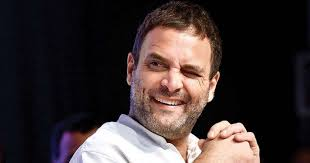

In [61]:
from IPython.display import Image
Image(filename='dataset/Modi_vs_Pappu/Single/images (1).jpg')

In [58]:

test_single_prediction("dataset/Modi_vs_Pappu/Single/images.jpg")


'Modi'

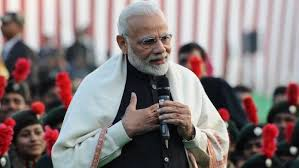

In [62]:
Image(filename='dataset/Modi_vs_Pappu/Single/images.jpg')